In [66]:
import IPython
import sklearn
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from IPython import get_ipython
import warnings 
warnings.filterwarnings("ignore")

In [67]:
data=pd.read_csv("Crop_recommendation.csv")


In [68]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [69]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [70]:
data.shape

(2200, 8)

In [71]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [72]:
data.duplicated().sum()
#data.drop_duplicates()

0

In [73]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [75]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [76]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [77]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [78]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [79]:
data.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [80]:
import plotly.express as px

In [81]:

#check any ouliers for each columns


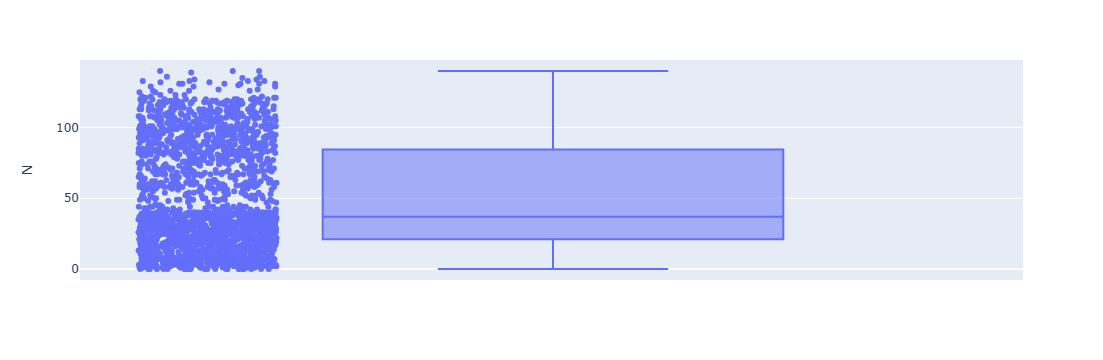

In [82]:
fig = px.box(data , y="N",points="all")
fig.show()

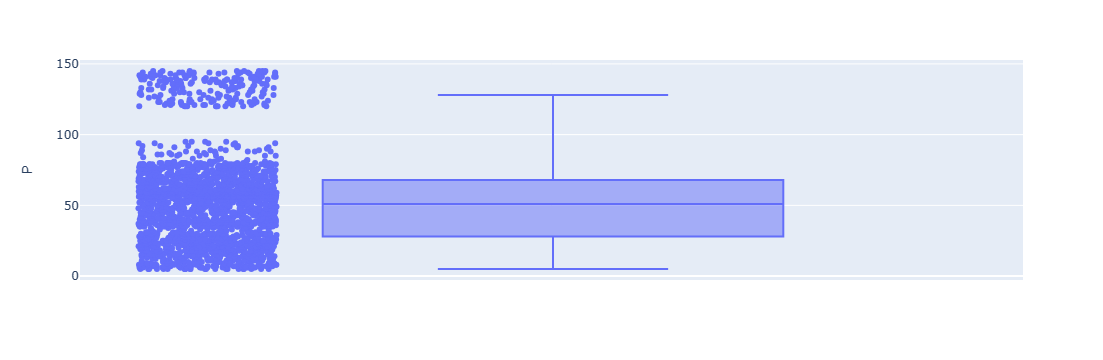

In [83]:
fig = px.box(data , y="P",points="all")
fig.show()

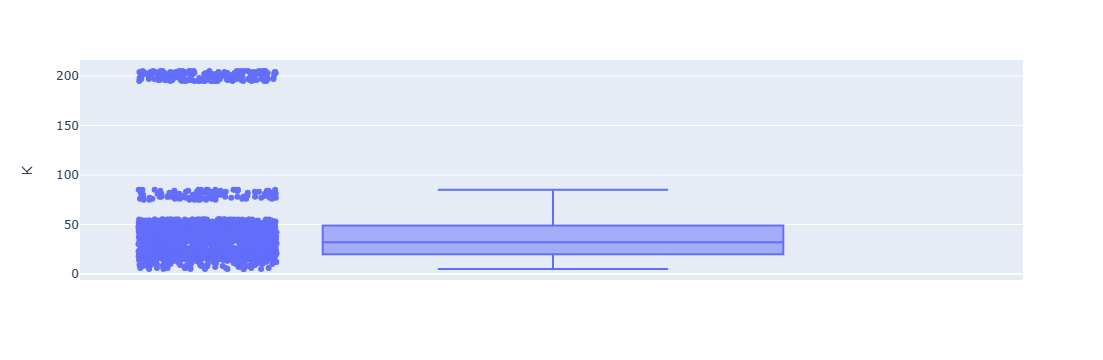

In [84]:
fig = px.box(data , y="K",points="all")
fig.show()

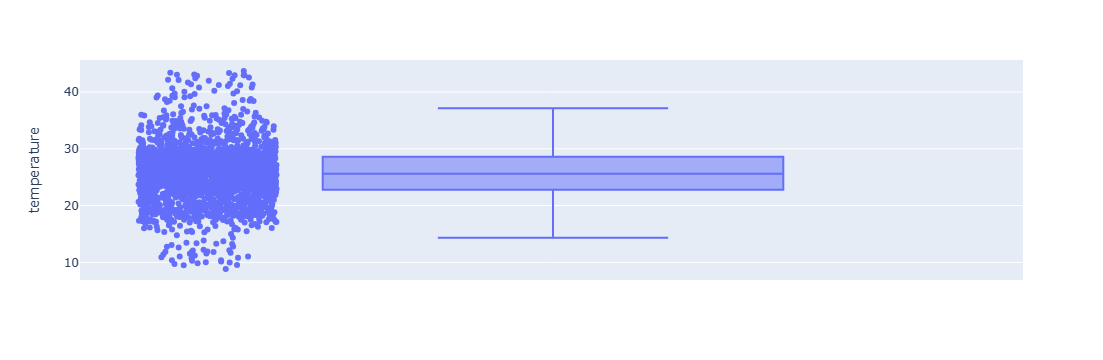

In [85]:
fig = px.box(data , y="temperature",points="all")
fig.show()

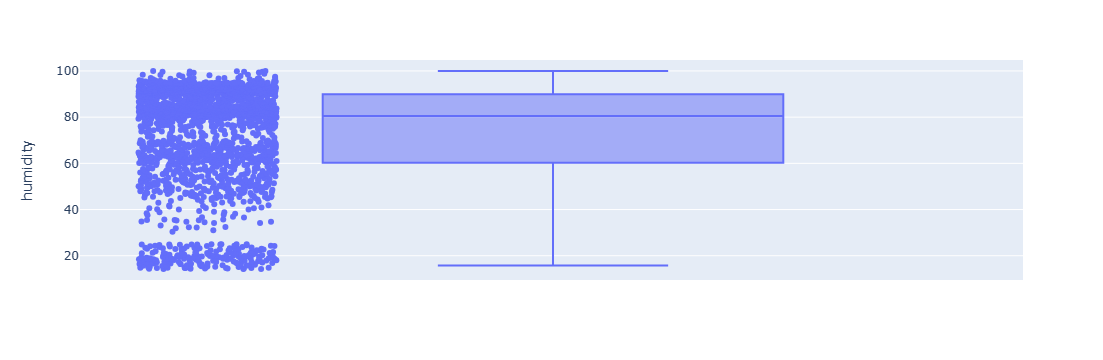

In [86]:
fig = px.box(data , y="humidity",points="all")
fig.show()

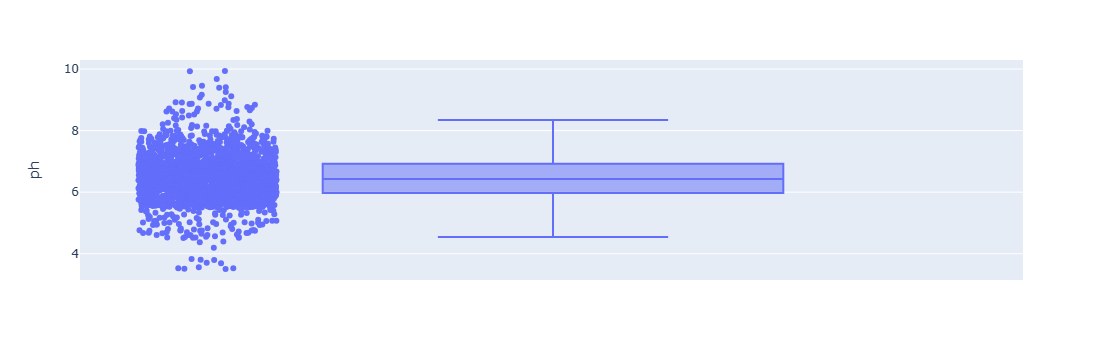

In [87]:
fig = px.box(data , y="ph",points="all")
fig.show()

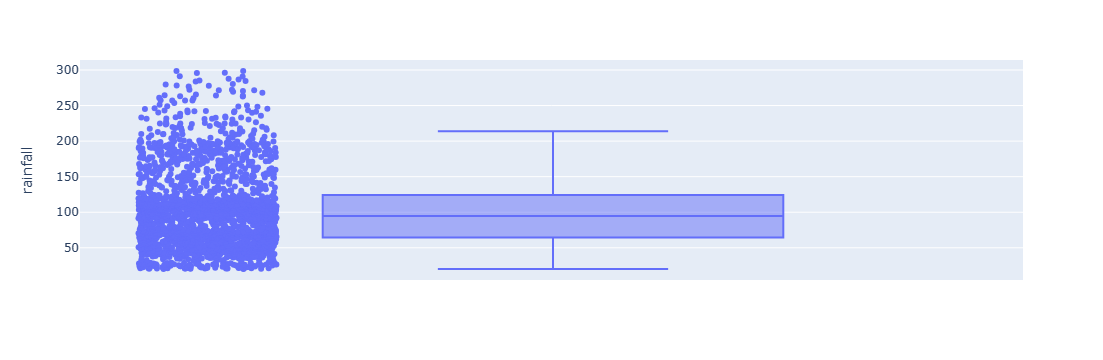

In [88]:

fig = px.box(data , y="rainfall",points="all")
fig.show()

In [89]:
data_new = data
data_new.columns = data_new.columns
data_new.head()
''' Detection '''
# IQR inter quartile range
Q1 = np.percentile(data_new['rainfall'], 25, interpolation='midpoint')
Q3 = np.percentile(data_new['rainfall'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", data_new.shape)

# Upper bound
upper = np.where(data_new['rainfall'] >= (Q3 + 1.5 * IQR))

# Lower bound
lower = np.where(data_new['rainfall'] <= (Q1 - 1.5 * IQR))

''' Removing the Outliers '''
h1=data_new.drop(upper[0],inplace= True )
h2=data_new.drop(lower[0],inplace= True)
print("New Shape:", data_new.shape)


Old Shape: (2200, 8)
New Shape: (2101, 8)


In [90]:
data=data_new

In [91]:
data_new = data
data_new.columns = data_new.columns
data_new.head()
''' Detection '''
# IQR interquartile range
Q1 = np.percentile(data_new['P'], 25, interpolation='midpoint')
Q3 = np.percentile(data_new['P'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", data_new.shape)

# Upper bound
upper = np.where(data_new['P'] >= (Q3 + 1.5 * IQR))

# Lower bound
lower = np.where(data_new['P'] <= (Q1 - 1.5 * IQR))

''' Removing the Outliers '''

h3=data_new.drop(upper[0])
h4=data_new.drop(lower[0])
print("New Shape:", data_new.shape)


Old Shape: (2101, 8)
New Shape: (2101, 8)


In [92]:
data=data_new

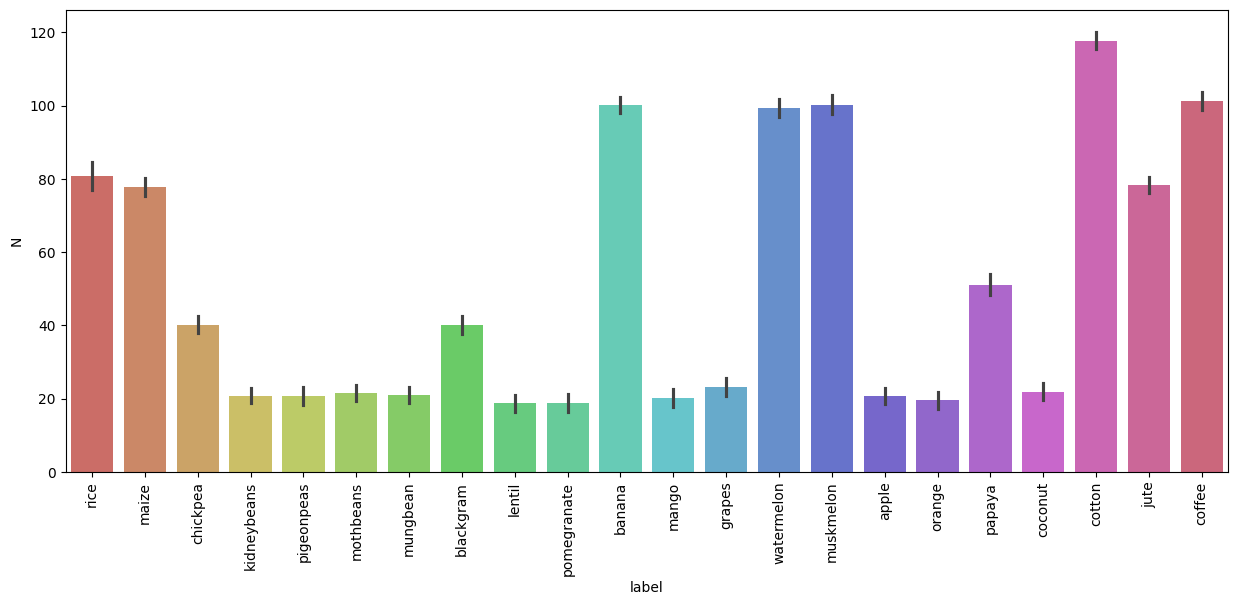

In [93]:
plt.figure(figsize=(15,6))
sns.barplot(y="N", x="label", data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [94]:
crop_summary_new=data.copy()


In [95]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

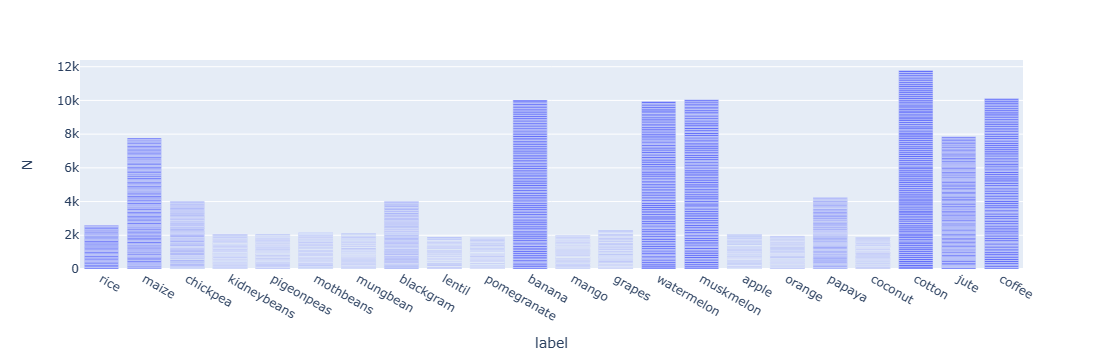

In [96]:
fig1=px.bar(crop_summary_new,x="label",y="N")
fig1.show()

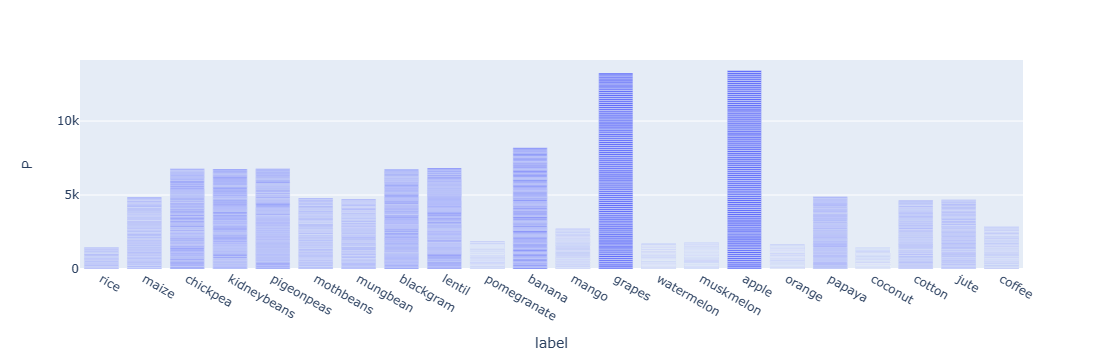

In [97]:
fig1=px.bar(crop_summary_new,x="label",y="P")
fig1.show()

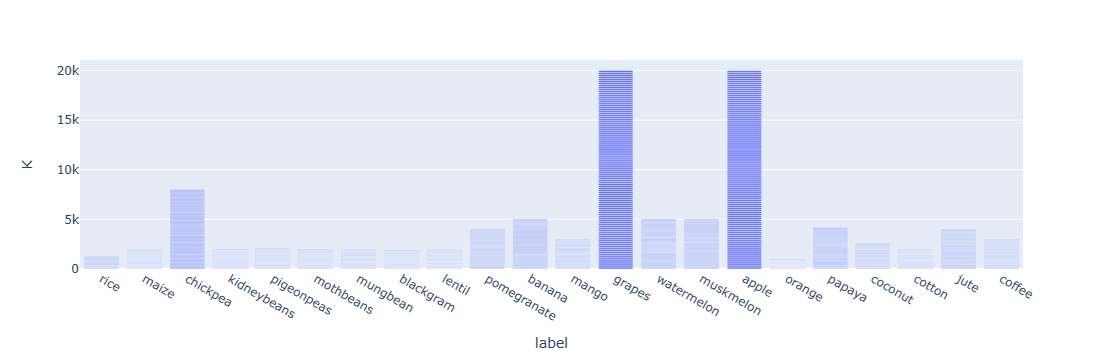

In [98]:
fig1=px.bar(crop_summary_new,x="label",y="K")
fig1.show()

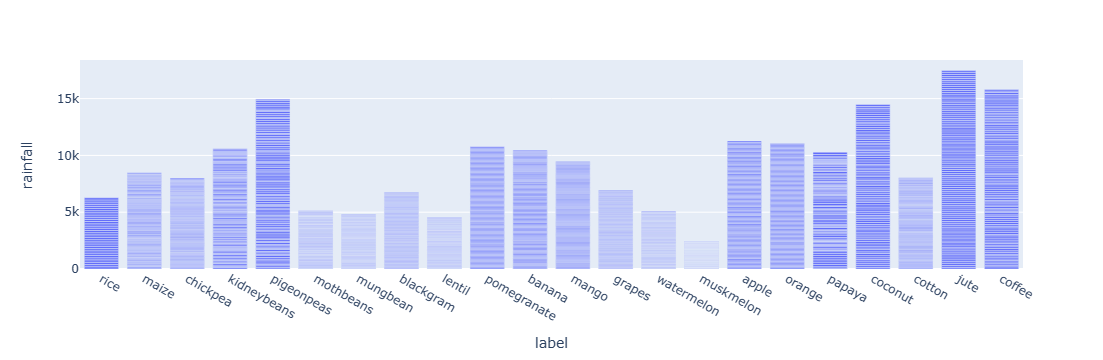

In [99]:
fig1=px.bar(crop_summary_new,x="label",y="rainfall")
fig1.show()

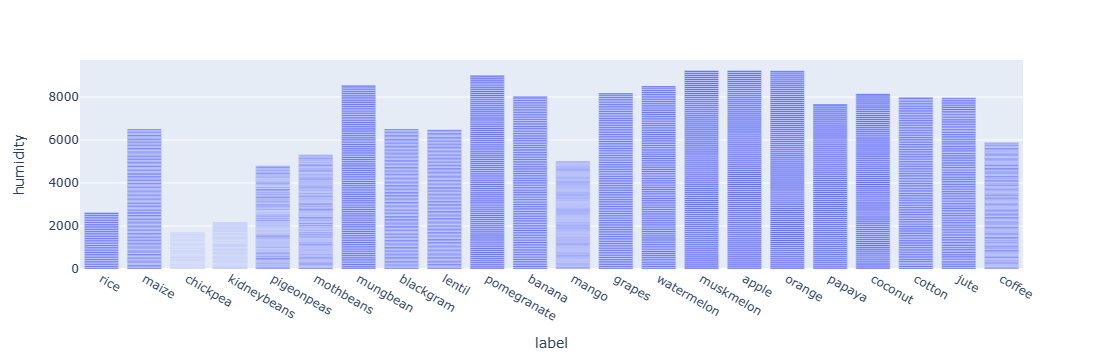

In [100]:
fig1=px.bar(crop_summary_new,x="label",y="humidity")
fig1.show()

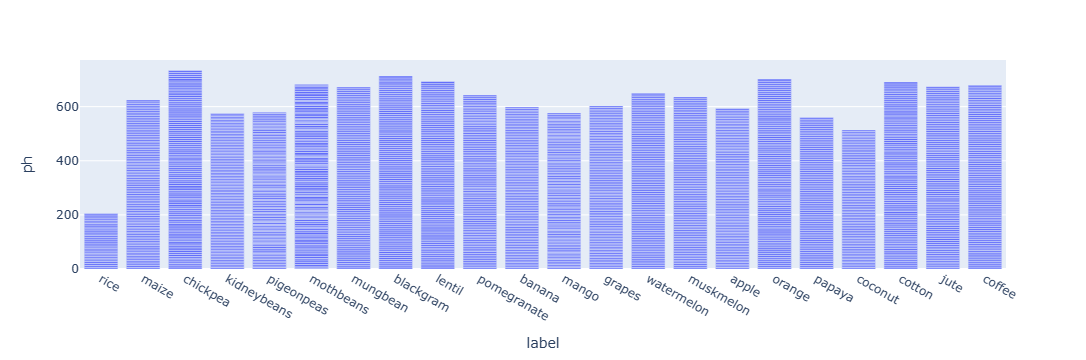

In [101]:
fig1=px.bar(crop_summary_new,x="label",y="ph")
fig1.show()

In [102]:
import random
from IPython.core.display import update_display

In [103]:
data1=data.drop("label",axis=1)
data1.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


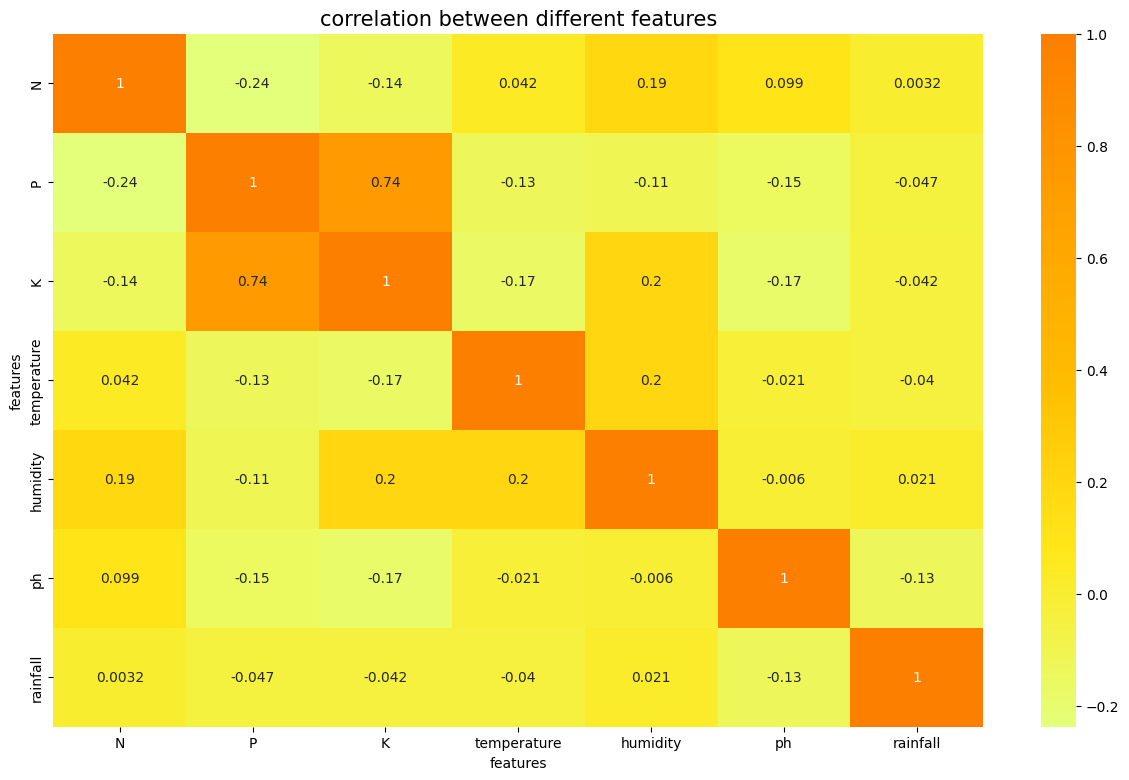

In [104]:

fig,ax=plt.subplots (1,1, figsize=(15,9)) 
sns.heatmap(data1.corr(), annot=True, cmap='Wistia') 
ax.set(xlabel='features')
ax.set (ylabel='features')
plt.title('correlation between different features', fontsize=15, c='black')
plt.show()

In [105]:
x=data.drop("label",axis=1)
y=data['label']

In [106]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2101 non-null   int64  
 1   P            2101 non-null   int64  
 2   K            2101 non-null   int64  
 3   temperature  2101 non-null   float64
 4   humidity     2101 non-null   float64
 5   ph           2101 non-null   float64
 6   rainfall     2101 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 195.9 KB


In [107]:
y.info()

<class 'pandas.core.series.Series'>
Index: 2101 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2101 non-null   object
dtypes: object(1)
memory usage: 97.4+ KB


In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [109]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 503 to 1129
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1680 non-null   int64  
 1   P            1680 non-null   int64  
 2   K            1680 non-null   int64  
 3   temperature  1680 non-null   float64
 4   humidity     1680 non-null   float64
 5   ph           1680 non-null   float64
 6   rainfall     1680 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 105.0 KB


In [110]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 907 to 1803
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            421 non-null    int64  
 1   P            421 non-null    int64  
 2   K            421 non-null    int64  
 3   temperature  421 non-null    float64
 4   humidity     421 non-null    float64
 5   ph           421 non-null    float64
 6   rainfall     421 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 26.3 KB


In [111]:
from catboost import CatBoostClassifier 

In [112]:
model = CatBoostClassifier() 
model.fit(x_train, y_train)

Learning rate set to 0.081248
0:	learn: 2.5305930	total: 39.5ms	remaining: 39.4s
1:	learn: 2.1600846	total: 77.5ms	remaining: 38.7s
2:	learn: 1.9147944	total: 124ms	remaining: 41.2s
3:	learn: 1.7160057	total: 156ms	remaining: 38.9s
4:	learn: 1.5392782	total: 187ms	remaining: 37.2s
5:	learn: 1.4020326	total: 216ms	remaining: 35.8s
6:	learn: 1.2812175	total: 247ms	remaining: 35s
7:	learn: 1.1685634	total: 275ms	remaining: 34.1s
8:	learn: 1.0681535	total: 311ms	remaining: 34.3s
9:	learn: 0.9906805	total: 339ms	remaining: 33.6s
10:	learn: 0.9137222	total: 370ms	remaining: 33.3s
11:	learn: 0.8534402	total: 400ms	remaining: 32.9s
12:	learn: 0.7947427	total: 428ms	remaining: 32.5s
13:	learn: 0.7427779	total: 457ms	remaining: 32.2s
14:	learn: 0.6946055	total: 479ms	remaining: 31.5s
15:	learn: 0.6534627	total: 500ms	remaining: 30.8s
16:	learn: 0.6150652	total: 521ms	remaining: 30.1s
17:	learn: 0.5834750	total: 553ms	remaining: 30.2s
18:	learn: 0.5504951	total: 582ms	remaining: 30.1s
19:	learn: 

In [113]:
y_pred1=model.predict(x_test)

In [114]:
from sklearn.metrics import accuracy_score
catboost_acc= accuracy_score(y_test,y_pred1)
print("catboost accuracy is "+str(catboost_acc))

catboost accuracy is 0.9928741092636579


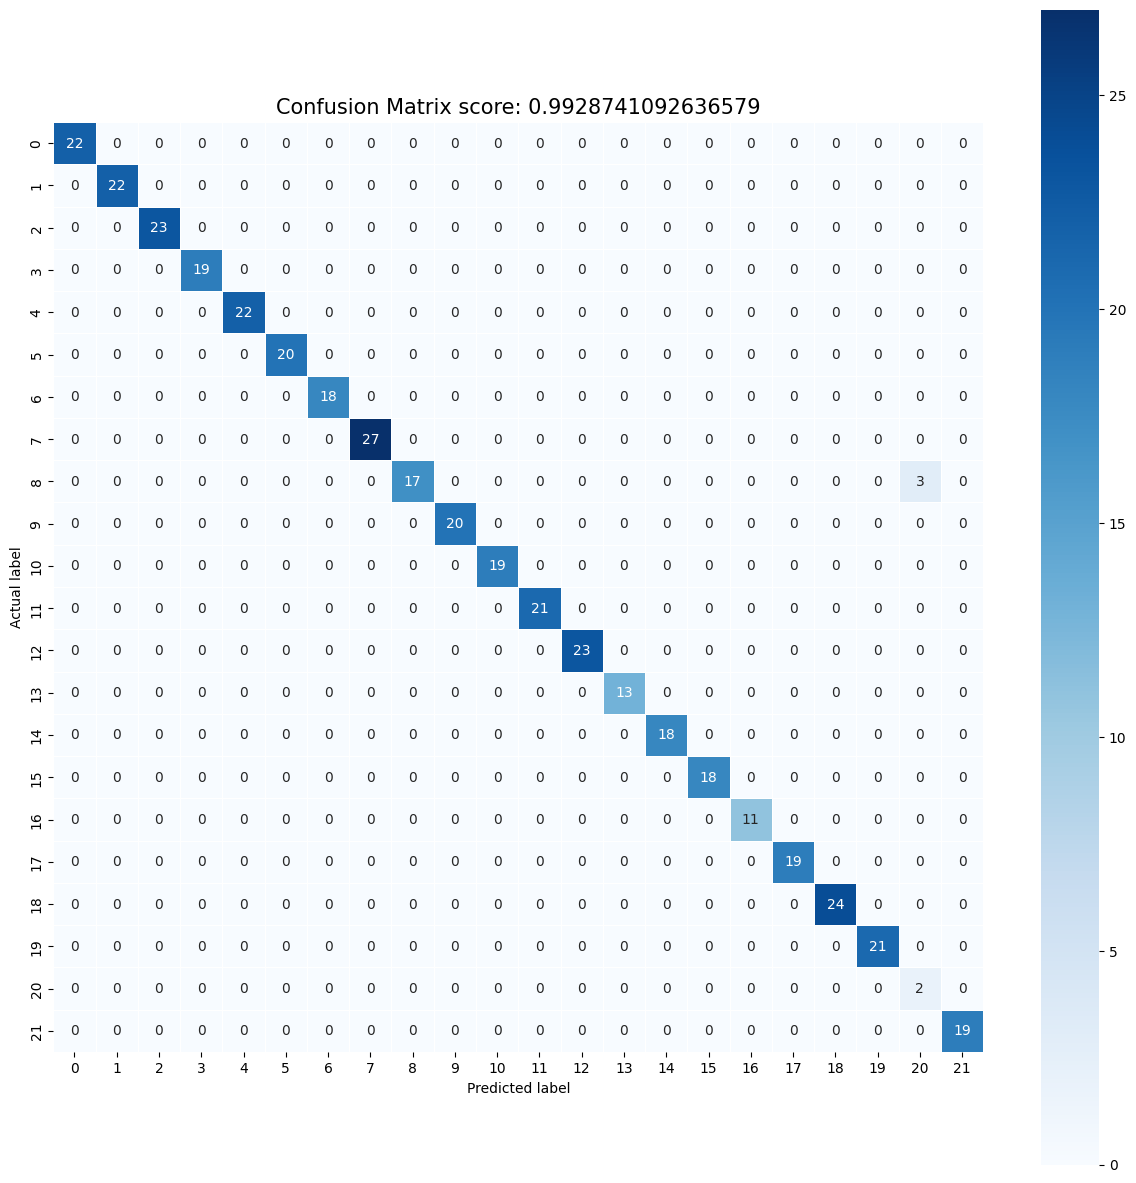

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_pred1)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Confusion Matrix score: "+str(accuracy_score (y_test,y_pred1)) 
plt.title(all_sample_title, size = 15);
plt.show()

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        27
        jute       1.00      0.85      0.92        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        19
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        13
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        11
      papaya       1.00    

In [117]:
x_test[0:1]

,N,P,K,temperature,humidity,ph,rainfall
907,6,30,40,22.770356,91.454985,6.361374,106.96592


In [118]:
result=model.predict(x_test[0:1])
print(result)


[['pomegranate']]


In [119]:
y_test[0:1]


907    pomegranate
Name: label, dtype: object

In [120]:
import joblib

In [121]:
file_name='crop_app'

In [122]:
joblib.dump(model,'crop_app')

['crop_app']

In [123]:
app=joblib.load('crop_app')

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

In [129]:
import lightgbm as lgb
model1=lgb.LGBMClassifier()
model1.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 1470, number of used features: 7
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -3.118630
[LightGBM] [Info] Start training from score -2.988953
[LightGBM] [Info] Start training from score -3.215480
[LightGBM] [Info] Start training from score -3.002558
[LightGBM] [Info] Start training from score -3.073510
[LightGBM] [Info] Start training from score -3.073510
[LightGBM] [Info] Start training from score -3.058911
[LightGBM] [Info] Start training from score -3.103363
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.103363
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] 

LGBMClassifier()

In [130]:
y_pred2=model1.predict(x_test)

In [131]:
from sklearn.metrics import accuracy_score
catboost_acc= accuracy_score(y_test,y_pred2)
print("lightbgm accuracy is "+str(catboost_acc))

lightbgm accuracy is 0.9873217115689382


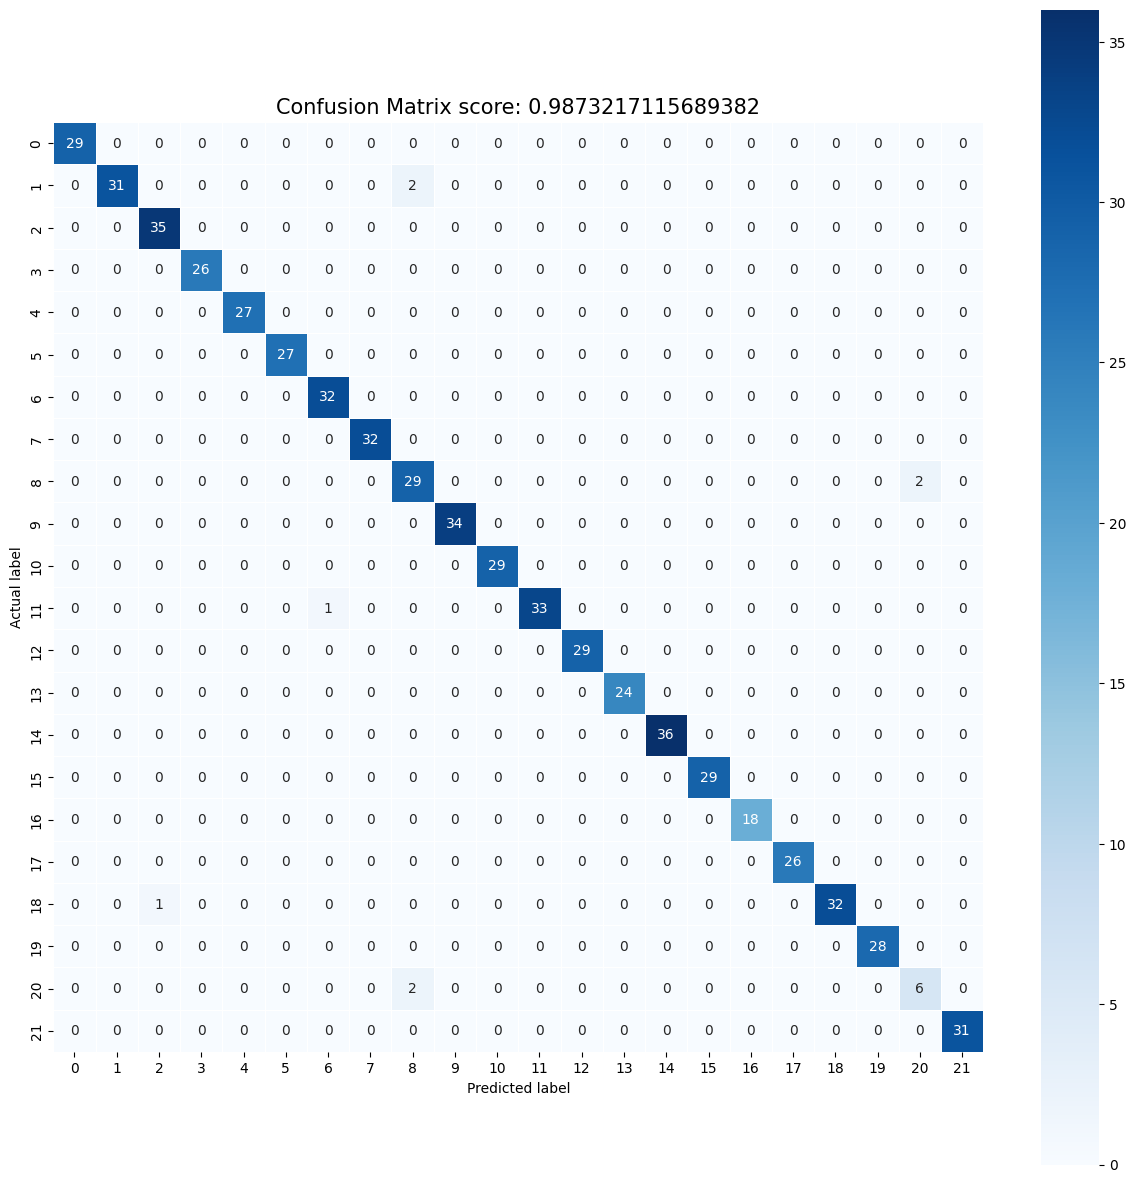

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_pred2)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Confusion Matrix score: "+str(accuracy_score (y_test,y_pred2)) 
plt.title(all_sample_title, size = 15);
plt.show()